<a href="https://colab.research.google.com/github/Recienvenido/ProyectoDS/blob/main/SegundaEntrega_Benitez%2BRedaelli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

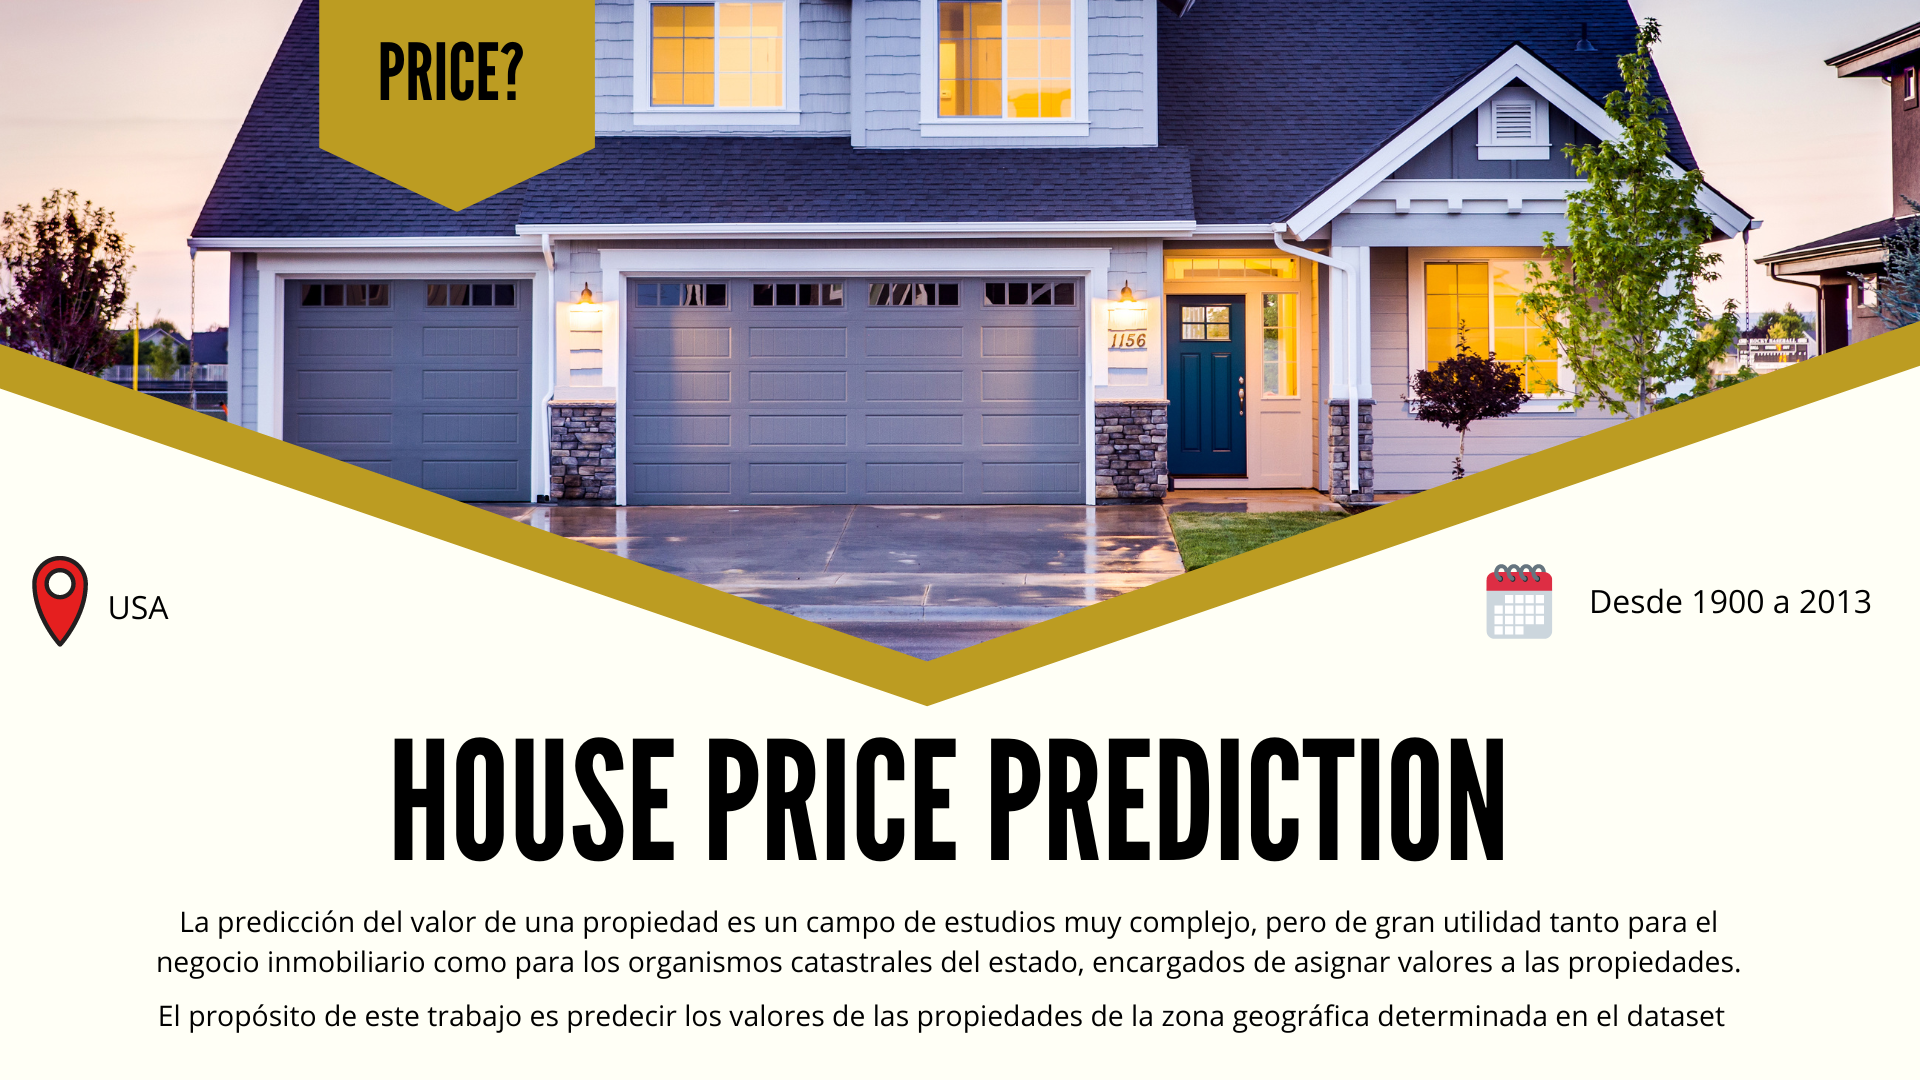

#**MERCADO INMOBILIARIO EN EL ESTADO DE WASHINGTON**
# **¿Qué ciudades ofrecen mayores ventajas para la inversión?** 


**Cuestiones de interés:**

Dado el contexto del mercado de bienes raíces en el estado de Washington ¿Cuál o cuáles ciudades se presentan como la oportunidad más atractiva para la inversión? ¿Se puede predecir el precio de las viviendas en las ciudades seleccionadas? 

# **Definición de objetivo, Contexto comercial, Problema Comercial y Contexto Analítico**

**Objetivo**

Como se mencionó en el abstrac, el objetivo del proyecto es la predicción del valor de venta de propiedades en algunos estados de USA;  utilizando como base el dataset “House price prediction”

**Contexto Comercial**

Los bienes raíces son un mercado muy competitivo y dinámico, poder predecir el precio de una propiedad conociendo sus características, implica una ventaja comercial muy grande con respecto a la competencia

**Problema comercial**

La estimación del precio de una propiedad es una tarea que pone en juego diversas características. El valor de una propiedad no está dado solamente por factores intrínsecos, sino que depende también del contexto, la oferta y la demanda. Un precio muy elevado provocaría una demora en la venta de la propiedad; un precio muy bajo implicaría una pérdida económica. En ambos casos se produce un desprestigio del agente inmobiliario.
La utilización de la ciencia de datos en la predicción de los valores de las propiedades, en el contexto actual, en donde no todas los los analistas de bienes raíces cuentan con estas herramientas, implica una ventaja sustancial sobre la competencia.

**Contexto Analítico**

El dataset utilizado tiene datos de multiples propiedades, en un amplio rango de superficies, calidades, ubicaciones y comodidades; a lo largo de más de cien años


# Análisis Exploratorio de Datos

In [38]:
#@title Llamado de librerías
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px  
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

In [31]:
#@title Presentación de dataframe
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRAiev8bA6Cb1HfikaijwxAQLhyGkWBCwWIFOHxniEC8Zr4N2aETu6gcb3JixJcsPxJBO3aqXU_bov5/pub?output=csv",sep=',')
print(df.shape)
df.head()

(4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 0:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 0:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [32]:
#@title Tipo de variables 
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [33]:
#@title Descripción de dataframe 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Buscamos si el dataset tiene valores nulos:

In [34]:
#@title Búsqueda de valores nulos 
df.apply(lambda x: sum(x.isnull()),axis=0)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Al no haber valores nulos en el dataset elegido, procedemos a buscar valores duplicados.

In [35]:
#@title Búsqueda de duplicados
duplicate = df[df.duplicated()] 
  
print("Filas duplicadas:") 

duplicate

Filas duplicadas:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


En esta ocasión, tampoco se escontraron valores duplicados.

Analizaremos los casos de valores cero:

In [36]:
#@title Búsqueda de valores iguales a cero 
df.apply(lambda x: sum(x==0),axis=0)

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

Eliminaremos los datos que el precio, las habitaciones o la cantidad de baños sean 0. Los otros 4 valores (waterfront, view, sqft_basement e yr_renovated) tienen sentido que sean 0 en caso que no tengan vista a fuente de agua, subsuelo o renovación.

In [37]:
#@title Eliminación de valores iguales a cero 
dfHousePrice = df.query("price>0 and bedrooms>0 and bathrooms>0")
dfHousePrice

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 0:00:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 0:00:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 0:00:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 0:00:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 0:00:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 0:00:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Como nuestra variable a predecir es el precio de las viviendas, no queremos tomarla en nuestro primer análisis. Intentaremos ver la variabilidad y la correlación de las restantes para poder ver si nuestra muestra es suficienta para el estudio o se encuentra sesgada de alguna manera.

Usaremos dos datasets adicionales de variables numéricas para algunos de los gráficos.

Un subconjunto que toma todas las variables numéricas a analizar, y un cuadro que, agrupado por año, nos devuelve la mediana de cada una de las variables restantes:

In [29]:
#@title Obtención de tabla con valores principales 
df_num = dfHousePrice[["bedrooms", 
                       "bathrooms", 
                       "sqft_living", 
                       "sqft_lot", 
                       "floors", 
                       "waterfront", 
                       "sqft_above",
                       "sqft_basement",
                       "yr_built"]]
df_num.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built
0,3,1.50,1340,7912,1.5,0,1340,0,1955
2,3,2.00,1930,11947,1.0,0,1930,0,1966
3,3,2.25,2000,8030,1.0,0,1000,1000,1963
4,4,2.50,1940,10500,1.0,0,1140,800,1976
5,2,1.00,880,6380,1.0,0,880,0,1938


In [10]:
#@title Obtención de tabla con valores estadísticos principales  
df_num2 = dfHousePrice.groupby(["yr_built"]).mean()
df_num2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated
yr_built,,,,,,,,,,,,
1900,701045.454545,3.409091,1.761364,1794.545455,5067.454545,1.454545,0.0,0.5,3.545455,1382.727273,411.818182,1722.454545
1901,506127.222222,3.444444,1.444444,1697.777778,4321.777778,1.444444,0.0,0.0,3.444444,1452.222222,245.555556,0.000000
1902,854725.000000,3.900000,2.250000,2547.000000,4475.800000,1.900000,0.0,0.0,3.900000,2249.000000,298.000000,0.000000
1903,513010.000000,3.400000,2.000000,1803.000000,5344.700000,1.600000,0.0,0.5,3.600000,1677.000000,126.000000,1203.000000
1904,501933.333333,3.000000,1.583333,1585.555556,3745.333333,1.333333,0.0,0.0,3.888889,1118.888889,466.666667,0.000000


1. Graficaremos un histograma con cada una de las variables numéricas principales para hacer una primera aproximación y ver la distribución de los datos disponibles:

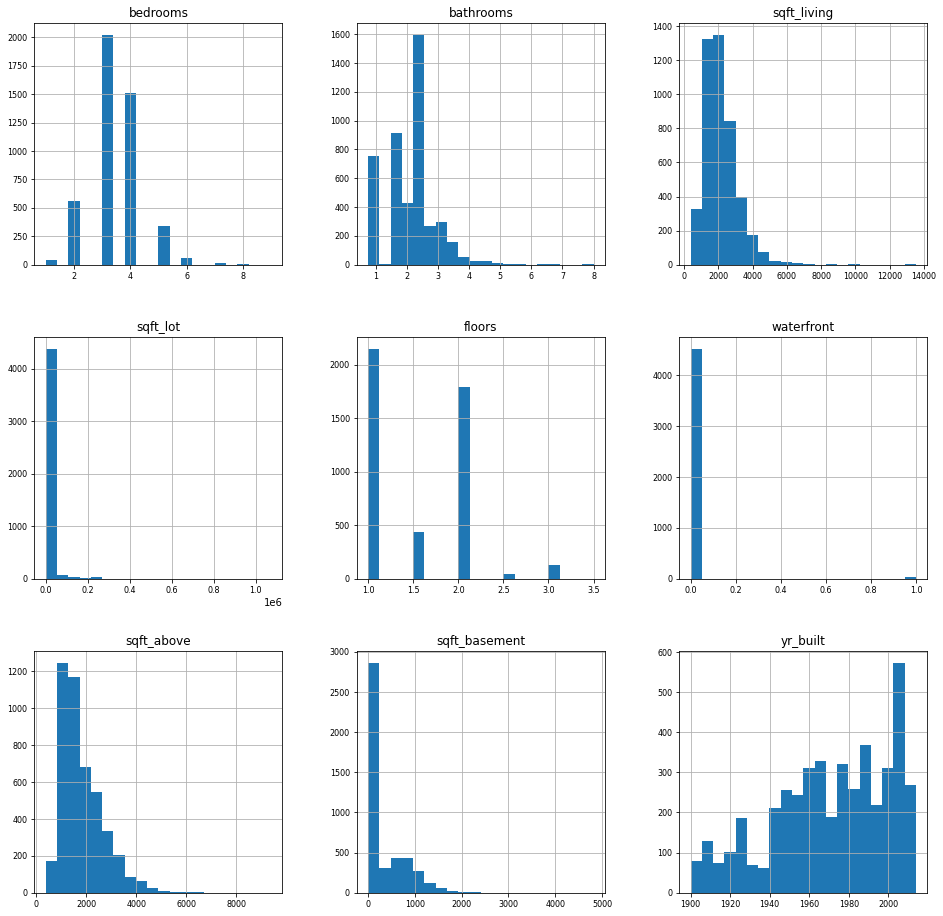

In [11]:
#@title Gráficos de barras 
df_num.hist(figsize = (16, 16), #determinamos el tamao de cada gráfico
            bins = 20,          #la cantidad de intervalos que consideraremos
            xlabelsize = 8,     #seteamos el tamaño de las etiquetas
            ylabelsize = 8)
plt.show()

Con este primer acercamiento podemos ver la distribución de cada una de las variables

2. En un gráfico de dispersión, graficaremos por cada año de construcción, las medianas de la cantidad de baños por habitación.

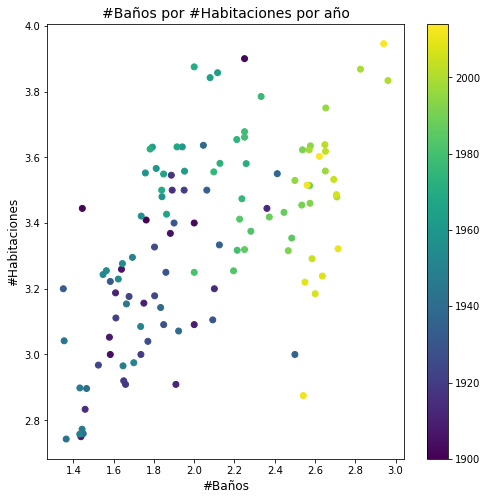

In [12]:
#@title Seteo de gráficos 
#Seteamos el tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 8))

#Definimos las variables a tomar en cuenta y cuál nos dirá el color
mapeo_colores = ax.scatter(df_num2["bathrooms"],
                           df_num2["bedrooms"], 
                           c=df_num2.index)

#Agregamos la barra de color para referencia
fig.colorbar(mapeo_colores)

#Seteamos el título y los encabezados
ax.set_title('#Baños por #Habitaciones por año',
             fontsize = 14)
ax.set_xlabel('#Baños',
             fontsize = 12)
ax.set_ylabel('#Habitaciones',
             fontsize = 12)
plt.show()

En este gráfico podemos observar que en las viviendas construidas post año 2000 se encuentran claramente en el tercio derecho de nuestro gráfico, es decir, las medianas de la cantidad de los baños se encuentran por sobre los 2.5.

En los años anteriores, a primera vista, no podemos sacar otra conclusión.

2. (bis) Agregamos como dato la etiqueta con los datos necesarios y el pamaño de la burbuja con el precio de las propiedades, para intentar ver una concordancia entre los valores

In [13]:
#@title Gráfico de dispersión I
fig = px.scatter( df_num2, x='bathrooms', y='bedrooms', size='price',
            color=df_num2.index,
            template='simple_white',
            labels={},
            title='#Baños por #Habitaciones por año',
            height=400
                )
fig.show()

3. Se graficará en un boxplot la relación entre área de la vivienda y la cantidad de dormitorios.

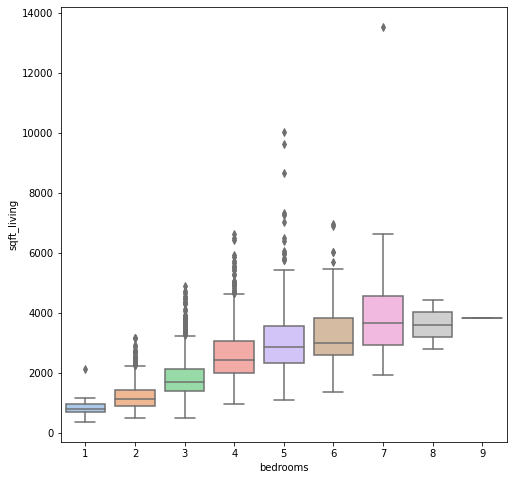

In [14]:
#@title Gráfico de boxplot
#Seteamos el tamaño del gráfico
plt.subplots(figsize = (8, 8))

#Elegimos el fondo del gráfico y la paleta de colores
sns.set_theme(style = "whitegrid", 
              palette="pastel")    

#Seteamos el título
ax.set_title(label = 'Metros cuadrados totales por #Habitaciones',
             fontsize = 14)

#Planteamos las variables a graficar
sns.boxplot(x = dfHousePrice["bedrooms"], 
            y = dfHousePrice["sqft_living"])
plt.show()

Podemos observar cómo aumenta la media de pies cuadrados de la vivienda a medida que aumentan la cantidad de habitabiones, y la gran variabilidad que estos abarcan.

Esto será relevante cuando hagamos el modelo de regresión lineal.

4. Graficatremos la distribución de los precios de las viviendas según la ciudad.

*Para tener variabilidad en los datos, consideraremos las ciudades con más de 100 registros:*

In [15]:
#@title Evaluación de ciudades con más de 100 registros 
tab1=pd.DataFrame(dfHousePrice["city"].value_counts().reset_index().rename({"index":"city", "city":"count"}, axis=1))
print(tab1.shape)
tab1.head(2)

(44, 2)


,city,count
0,Seattle,1560
1,Renton,291


In [16]:
#@title Tabla de distribución de precios 
tab2= dfHousePrice.merge(tab1, how='left', on='city').query("count>100")
print(tab2.shape)
tab2.head(2)

(3651, 19)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,count
0,2014-05-02 0:00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,123
1,2014-05-02 0:00:00,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1560


In [17]:
#@title Gráfico de dispersión II
fig = px.scatter(tab2, x="sqft_living", y="price", color="city", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()	

4. (bis) repetimos el gráfico quedándonos con los montos por debajo del percentil .9

In [30]:
#@title Gráfico evaluando percentil 9 
tope=tab2.price.quantile(.9)
print("percentil .9:", tope)
tab3=tab2.query("price<900000.0")
print(tab3.shape)
tab3.head(2)

percentil .9: 900000.0
(3279, 19)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,count
0,2014-05-02 0:00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,123
2,2014-05-02 0:00:00,342000.0,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,184


In [20]:
#@title Gráfico de dispersión II 
fig = px.scatter(tab3, x="sqft_living", y="price", color="city", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()	

Así, podemos ver la variabilidad de los precios según sus ciudades. Si bien tomamos únicamente los valores dentro de los primeros 90% de los datos, podemos ver la regresión de cada ciudad (filtrando a la derecha, podemos ver ciudad a ciudad)

Los casos con precios tan altos, son errores Están bien tasadas las propiedades?

Veamos el caso de la ciudad "Kent"

In [39]:
#@title Gráfico Ciudad de Kent
tab4=tab2[tab2.city=='Kent']
fig = px.scatter(tab4, x="sqft_living", y="price", color="city",  marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()	

En este caso, el valor máximo del precio se aleja mucho de la mediana. 

En los próximos pasos eliminaremos algunos de estos casos.

In [22]:
tab5=dfHousePrice[dfHousePrice.city=='Kent']
tab6=tab5[dfHousePrice.sqft_living==1180]
tab6

<ipython-input-22-171e2ff85140>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 0:00:00,26590000.0,3,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


Vemos que en este caso, el incremento del precio viene acompañado por la crecida de los metros cuadrados totales y no de los de la vivienda.

5. En el siguiente gráfico, se representará la densidad del área de las propiedades. 
Para este gráfico usaremos la mediana de cada año, para ver la distribución de la variable a lo largo del tiempo, y no de la totalidad del dataset.

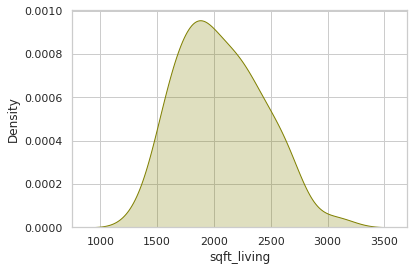

In [23]:
#@title Gráfico base de densidad
#Planteamos un gráfico base de densidad con sombra
sns.kdeplot(df_num2['sqft_living'], 
            shade = True, 
            color = 'olive')
plt.show()

Podemos visualizar la distribución de la variable, en la cual podemos observar una tendencia a una distribución normal.

6. Planteamos una matriz de gráficos de densidad, de dispersión y de curvas de nivel.

Luego del análisis del gráfico anterior, planteamos una matriz para ver la distribución tanto de cada una de las variables Habitaciones, Baños, Pies cuadrados totales, Pisos y Pies cuadrados de la vivienda como de su distribucion dos a dos.

Para esto planteamos:
1. Gráficos de dispersión en la parte de la triangular superior de la matríz, para plantear la relación por cada dos de las variables
2. Graficos de densidad en la diagonal, para replicar el gráfico anterior en cada variable
3. Gráfico de curvas de nivel en la triangular inferior (cabe aclarar que este gráfico sería un espejo de la triangular superior si volviesemos a hacer de dispersión, así que se decidió hacer gráficos de densidad para, además de ver la relación de las variables dos a dos, ver la densidad de la misma.

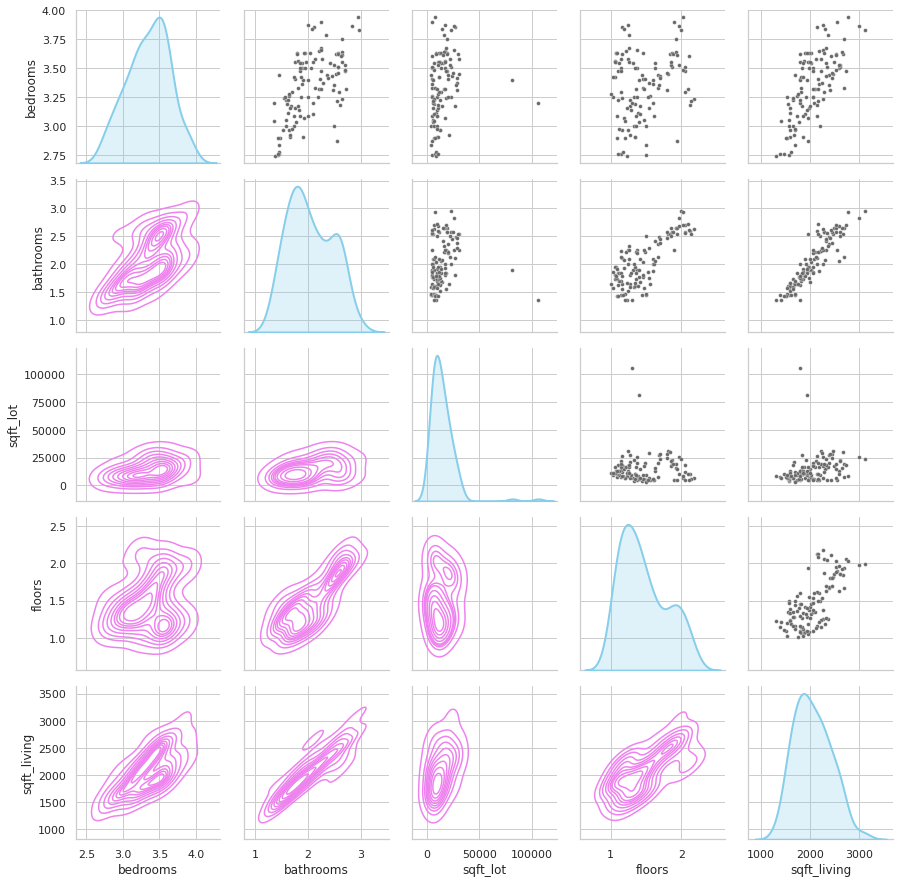

In [24]:
#Planteamos el fondo de los gráficos
sns.set_theme(style="whitegrid")

#
df = df_num2[["bedrooms", 
            "bathrooms", 
             "sqft_lot", 
             "floors",
             "sqft_living"]]

g = sns.PairGrid(df, 
                 diag_sharey = False)
g.map_upper(sns.scatterplot, 
            s = 15, 
            color = 'dimgray')
g.map_lower(sns.kdeplot, 
            color = 'violet')
g.map_diag(sns.kdeplot,
           color = 'skyblue', 
           lw = 2,
          shade = "True")

plt.show()

En la diagonal, vemos en las variables Habitaciones y Pies cuadrados de la vivienda una distribución con tendencia a normal. En el resto de las variables, vemos distribuciones asimétricas a derecha, con una acentuación mayor en Pies cuadrados totales.

En la triangular superior, podemos ver una alta correlación positiva en la posición (2,5) correspondiente al gráfico de Baños sobre Pies cuadrados de la vivienda.

En las posiciones (1,2), (1,5), (2,4) y (4,5) vemos una baja correlación positiva.

En el resto de las posiciones, se podrían tratar de relaciones causales.

En tanto la triangular inferior, podemos ver la densidad de estas relaciones. En la posición (5,2) se observa el gráfico correspondiente a las variables Pies cuadrados de la vivienda y Baños. En este caso podemos ver que la densidad es tan fuerte como la correlación que se percibía en la posición (2,5).

En las posiciones (4,2) y (5,4) vemos una mayor correlación de las variables que en las demás.

Con respecto a las demás, podemos observar unos centros bien marcados y unas curvas que se distribuyen con mucha uniformidad.

6. (bis) Sumamos el gráfico de los coeficientes de correlación de las variables antes expuestas para reafirmar (o refutar) nuestras teorías obtenidas en la matríz anterior

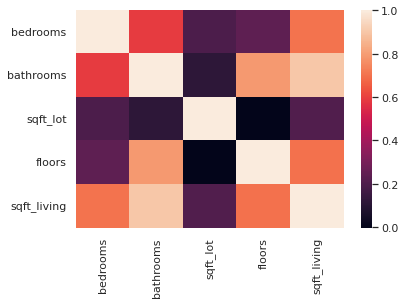

In [25]:
sns.heatmap(df.corr())
plt.show()

En la escala de color podemos observar que las variables con mayor valor predictivo son las mismas que planteamos anteriormente, pero ahora las podemos ordenar de mejor manera.

6. (bis bis) Sumamos el gráfico pairplot de las variables antes expuestas para reafirmar nuestras teorías obtenidas en las matrices anteriores

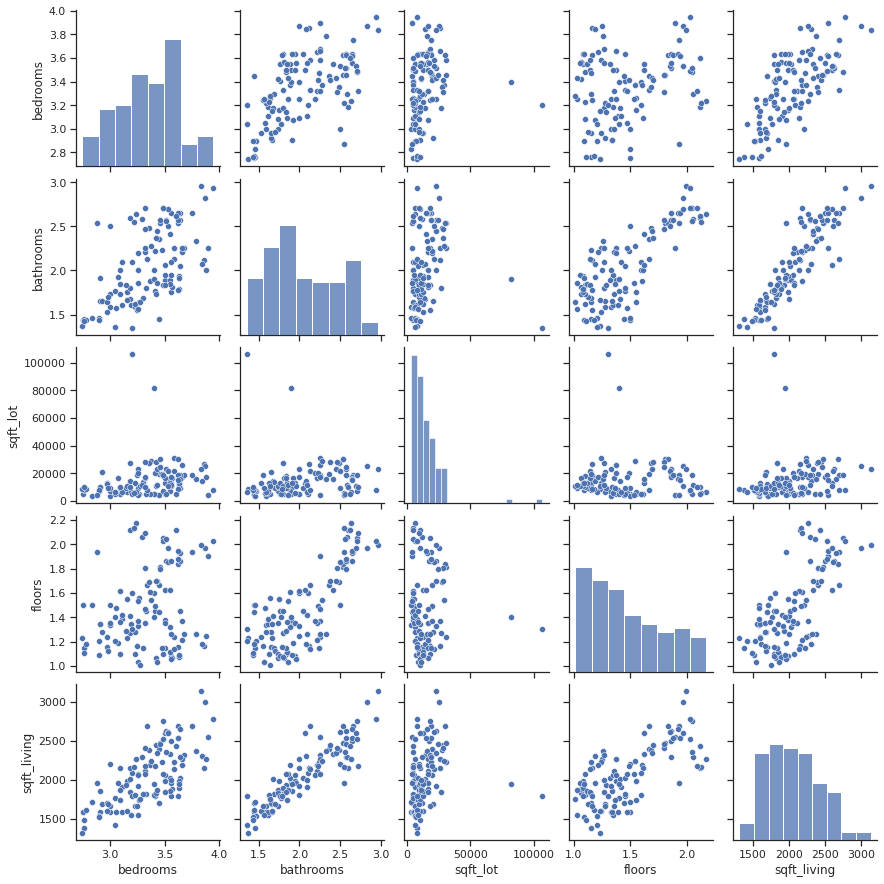

In [26]:
sns.set(style='ticks', color_codes=True)
Visual = sns.pairplot(df)

Con este último gráfico, visto en clase, podemos ver la correlación con la matríz armada anteriormente. 

Como vimos en los gráficos del punto 4, estamos teniendo unos outliers en el campo de precio. Por este motivo, eliminaremos el 5% superior de estos datos:

In [27]:
tope=dfHousePrice.price.quantile(.95)
print("percentil .95:", tope)

percentil .95: 1185000.6


In [28]:
dfHousePrice = dfHousePrice.query("price<1185000.6")
dfHousePrice

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00:00,313000.0000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 0:00:00,342000.0000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00:00,420000.0000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00:00,550000.0000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 0:00:00,490000.0000,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 0:00:00,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 0:00:00,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 0:00:00,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 0:00:00,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Feature Selection

In [ ]:
import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
dfHousePrice.date.drop_duplicates().sort_values()

In [ ]:
dfHousePrice[["city", "statezip"]].drop_duplicates().groupby("statezip").agg({"city":"count"}).reset_index().sort_values("city", ascending=False).query("city>1")

,statezip,city
3,WA 98004,4
69,WA 98168,4
0,WA 98001,3
73,WA 98198,3
66,WA 98148,3
65,WA 98146,2
37,WA 98059,2
34,WA 98056,2
26,WA 98042,2
22,WA 98034,2


Se van a descartar como entrada:
1. Fecha (*date*), dado que es la fecha de tasación, es toda dentro de 2 meses, así que no se cuenta con variabilidad como para sumarlo como atributo predictivo.
2. País (*country*), dado que todos son USA.
3. Dirección (*street*), dado que sumaría demasiadas columnas potenciales para sumar a la predictividad.

De variables categóricas se utilizarán la ciudad (*city*) y el código postal (*statezip*). Se decidió usar ambas porque, como vimos anteriormente, hay algunos códigos que se encuentran en distintas ciudades. En un primer momento, se pensó desestimar la ciudad.

In [ ]:
data_x=dfHousePrice.drop(["date" , "price", "street", "country" ], axis=1)
data_y=dfHousePrice['price'].astype(int)

In [ ]:
numeric_features = data_x.select_dtypes(include=np.number).columns.tolist()
numeric_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [ ]:
categorical_features = [x for x in data_x.columns if x not in numeric_features]
categorical_features

['city', 'statezip']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

Encodeamos las variables cateóricas:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder.fit(data_x[categorical_features])
nombres_dummies = one_hot_encoder.get_feature_names(['city', 'codp'])
matriz_dummies = one_hot_encoder.transform(data_x[categorical_features]).toarray()
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=data_x.index)
data_x = data_x.join(df_dummies)
data_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,codp_WA 98001,codp_WA 98002,codp_WA 98003,codp_WA 98004,codp_WA 98005,codp_WA 98006,codp_WA 98007,codp_WA 98008,codp_WA 98010,codp_WA 98011,codp_WA 98014,codp_WA 98019,codp_WA 98022,codp_WA 98023,codp_WA 98024,codp_WA 98027,codp_WA 98028,codp_WA 98029,codp_WA 98030,codp_WA 98031,codp_WA 98032,codp_WA 98033,codp_WA 98034,codp_WA 98038,codp_WA 98039,codp_WA 98040,codp_WA 98042,codp_WA 98045,codp_WA 98047,codp_WA 98050,codp_WA 98051,codp_WA 98052,codp_WA 98053,codp_WA 98055,codp_WA 98056,codp_WA 98057,codp_WA 98058,codp_WA 98059,codp_WA 98065,codp_WA 98068,codp_WA 98070,codp_WA 98072,codp_WA 98074,codp_WA 98075,codp_WA 98077,codp_WA 98092,codp_WA 98102,codp_WA 98103,codp_WA 98105,codp_WA 98106,codp_WA 98107,codp_WA 98108,codp_WA 98109,codp_WA 98112,codp_WA 98115,codp_WA 98116,codp_WA 98117,codp_WA 98118,codp_WA 98119,codp_WA 98122,codp_WA 98125,codp_WA 98126,codp_WA 98133,codp_WA 98136,codp_WA 98144,codp_WA 98146,codp_WA 98148,codp_WA 98155,codp_WA 98166,codp_WA 98168,codp_WA 98177,codp_WA 98178,codp_WA 98188,codp_WA 98198,codp_WA 98199,codp_WA 98288,codp_WA 98354
0,3,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,5,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,Seattle,WA 98119,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,Kent,WA 98042,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [ ]:
data_x=data_x.drop(categorical_features, axis=1)
data_x.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,codp_WA 98001,codp_WA 98002,codp_WA 98003,codp_WA 98004,codp_WA 98005,codp_WA 98006,codp_WA 98007,codp_WA 98008,codp_WA 98010,codp_WA 98011,codp_WA 98014,codp_WA 98019,codp_WA 98022,codp_WA 98023,codp_WA 98024,codp_WA 98027,codp_WA 98028,codp_WA 98029,codp_WA 98030,codp_WA 98031,codp_WA 98032,codp_WA 98033,codp_WA 98034,codp_WA 98038,codp_WA 98039,codp_WA 98040,codp_WA 98042,codp_WA 98045,codp_WA 98047,codp_WA 98050,codp_WA 98051,codp_WA 98052,codp_WA 98053,codp_WA 98055,codp_WA 98056,codp_WA 98057,codp_WA 98058,codp_WA 98059,codp_WA 98065,codp_WA 98068,codp_WA 98070,codp_WA 98072,codp_WA 98074,codp_WA 98075,codp_WA 98077,codp_WA 98092,codp_WA 98102,codp_WA 98103,codp_WA 98105,codp_WA 98106,codp_WA 98107,codp_WA 98108,codp_WA 98109,codp_WA 98112,codp_WA 98115,codp_WA 98116,codp_WA 98117,codp_WA 98118,codp_WA 98119,codp_WA 98122,codp_WA 98125,codp_WA 98126,codp_WA 98133,codp_WA 98136,codp_WA 98144,codp_WA 98146,codp_WA 98148,codp_WA 98155,codp_WA 98166,codp_WA 98168,codp_WA 98177,codp_WA 98178,codp_WA 98188,codp_WA 98198,codp_WA 98199,codp_WA 98288,codp_WA 98354
0,3,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,5,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
regresionHP = SelectKBest(f_regression, k=12)
regresionHP.fit(data_x, data_y)
X_new = regresionHP.transform(data_x)
print(X_new.shape)
pd.DataFrame(X_new)

(4549, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,3.00,1.50,1340.00,1.50,0.00,0.00,1340.00,0.00,0.00,0.00,0.00,0.00
1,5.00,2.50,3650.00,2.00,0.00,4.00,3370.00,280.00,0.00,0.00,0.00,0.00
2,3.00,2.00,1930.00,1.00,0.00,0.00,1930.00,0.00,0.00,0.00,0.00,0.00
3,3.00,2.25,2000.00,1.00,0.00,0.00,1000.00,1000.00,1.00,0.00,0.00,0.00
4,4.00,2.50,1940.00,1.00,0.00,0.00,1140.00,800.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4544,3.00,1.75,1510.00,1.00,0.00,0.00,1510.00,0.00,0.00,0.00,0.00,0.00
4545,3.00,2.50,1460.00,2.00,0.00,0.00,1460.00,0.00,1.00,0.00,0.00,0.00
4546,3.00,2.50,3010.00,2.00,0.00,0.00,3010.00,0.00,0.00,0.00,0.00,0.00
4547,4.00,2.00,2090.00,1.00,0.00,0.00,1070.00,1020.00,0.00,0.00,0.00,0.00


In [ ]:
variables_predictoras = regresionHP.get_feature_names_out()
variables_predictoras

array(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'sqft_above', 'sqft_basement', 'city_Bellevue',
       'city_Mercer Island', 'codp_WA 98004', 'codp_WA 98040'],
      dtype=object)

Usaremos además, las variables 'sqft_lot', 'yr_built'e 'yr_renovated'

In [ ]:
variables_predictoras2 = list(variables_predictoras) + [ 'sqft_lot', 'yr_built', 'yr_renovated']
variables_predictoras2

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'city_Bellevue',
 'city_Mercer Island',
 'codp_WA 98004',
 'codp_WA 98040',
 'sqft_lot',
 'yr_built',
 'yr_renovated']

# Algoritmo de Regresión

Vamos a desarrollar modelos de regresión lineal múltiple con la siguiente especificación:

$E(precio|X) = 
  \beta_0 
+ \beta_1   \cdot X_{bedrooms} 
+ \beta_2   \cdot X_{bathrooms} 
+ \beta_3   \cdot X_{sqft\_living}
+ \beta_4   \cdot X_{floors}
+ \beta_5   \cdot X_{view} 
+ \beta_6   \cdot X_{sqft\_above}
+ \beta_{7} \cdot X_{sqft\_basement}
+ \beta_{8} \cdot X_{city\_Auburn}
+ \beta_{9} \cdot X_{city\_Bellevue}
+ \beta_{10}\cdot X_{city\_Federal Way}
+ \beta_{11}\cdot X_{city\_Kent}
+ \beta_{12}\cdot X_{city\_Sammamish}
+ \beta_{13}\cdot  X_{sqft\_lot}
+ \beta_{14}\cdot X_{yr\_built}
+ \beta_{15}\cdot X_{yr\_renovated}
+ \beta_{16}\cdot (X_{sqft\_living} / X_{sqft\_lot})
+ \beta_{17}\cdot (X_{sqft\_lot} / X_{floors}) 
+ \beta_{18}\cdot (X_{sqft\_above} / X_{sqft\_lot}) 
+ \beta_{19}\cdot (X_{sqft\_basement} / X_{sqft\_lot}) 
+ \beta_{20}\cdot (X_{yr\_built} * X_{yr\_renovated})  $

Que considere una interacción tanto en metros cuadrados como entre el año de renovación con el año de construcción.


In [ ]:
# Creamos las variables de interacción
data_x['interaccion_sqft_liv_lot'] = data_x['sqft_living'] / data_x['sqft_lot']
data_x['interaccion_sqft_lot_floor'] = data_x['sqft_lot'] / data_x['floors'] 
data_x['interaccion_sqft_abo_lot'] = data_x['sqft_above'] / data_x['sqft_lot']
data_x['interaccion_sqft_base_lot'] = data_x['sqft_basement'] * data_x['sqft_lot']
data_x['interaccion_yr_built_ren'] = data_x['yr_built'] * data_x['yr_renovated']
data_x.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,codp_WA 98001,codp_WA 98002,codp_WA 98003,codp_WA 98004,codp_WA 98005,codp_WA 98006,codp_WA 98007,codp_WA 98008,codp_WA 98010,codp_WA 98011,codp_WA 98014,codp_WA 98019,codp_WA 98022,codp_WA 98023,codp_WA 98024,codp_WA 98027,codp_WA 98028,codp_WA 98029,codp_WA 98030,codp_WA 98031,codp_WA 98032,codp_WA 98033,codp_WA 98034,codp_WA 98038,codp_WA 98039,codp_WA 98040,codp_WA 98042,codp_WA 98045,codp_WA 98047,codp_WA 98050,codp_WA 98051,codp_WA 98052,codp_WA 98053,codp_WA 98055,codp_WA 98056,codp_WA 98057,codp_WA 98058,codp_WA 98059,codp_WA 98065,codp_WA 98068,codp_WA 98070,codp_WA 98072,codp_WA 98074,codp_WA 98075,codp_WA 98077,codp_WA 98092,codp_WA 98102,codp_WA 98103,codp_WA 98105,codp_WA 98106,codp_WA 98107,codp_WA 98108,codp_WA 98109,codp_WA 98112,codp_WA 98115,codp_WA 98116,codp_WA 98117,codp_WA 98118,codp_WA 98119,codp_WA 98122,codp_WA 98125,codp_WA 98126,codp_WA 98133,codp_WA 98136,codp_WA 98144,codp_WA 98146,codp_WA 98148,codp_WA 98155,codp_WA 98166,codp_WA 98168,codp_WA 98177,codp_WA 98178,codp_WA 98188,codp_WA 98198,codp_WA 98199,codp_WA 98288,codp_WA 98354,interaccion_sqft_liv_lot,interaccion_sqft_lot_floor,interaccion_sqft_abo_lot,interaccion_sqft_base_lot,interaccion_yr_built_ren
0,3,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,5274.67,0.17,0,3919775
1,5,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,4525.00,0.37,2534000,0


In [ ]:
variables_predictoras3 = variables_predictoras2 + ['interaccion_sqft_liv_lot', 'interaccion_sqft_lot_floor', 'interaccion_sqft_abo_lot', 'interaccion_sqft_base_lot', 
                                                         'interaccion_yr_built_ren']
variables_predictoras3

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'city_Bellevue',
 'city_Mercer Island',
 'codp_WA 98004',
 'codp_WA 98040',
 'sqft_lot',
 'yr_built',
 'yr_renovated',
 'interaccion_sqft_liv_lot',
 'interaccion_sqft_lot_floor',
 'interaccion_sqft_abo_lot',
 'interaccion_sqft_base_lot',
 'interaccion_yr_built_ren']

Se dividirá el dataset en 80-20 entre train y test.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

In [ ]:
print("El dataset de entrenamiento cuenta con ", len(x_train), " observaciones")
print("El dataset de evaluación cuenta con ", len(x_test), " observaciones")

El dataset de entrenamiento cuenta con  3639  observaciones
El dataset de evaluación cuenta con  910  observaciones


In [ ]:
x_train_modelo = x_train[variables_predictoras3]
x_train_modelo.head(2)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city_Bellevue,city_Mercer Island,codp_WA 98004,codp_WA 98040,sqft_lot,yr_built,yr_renovated,interaccion_sqft_liv_lot,interaccion_sqft_lot_floor,interaccion_sqft_abo_lot,interaccion_sqft_base_lot,interaccion_yr_built_ren
4440,3,2.25,1490,2.00,0,0,1490,0,0.00,0.00,0.00,0.00,4522,2009,0,0.33,2261.00,0.33,0,0
2579,3,1.50,1760,1.00,0,0,1160,600,0.00,0.00,0.00,0.00,6723,1958,2004,0.26,6723.00,0.17,4033800,3923832


## Aplicamos un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_lineal = LinearRegression(fit_intercept=True)

In [ ]:
# Proceso de estimación
modelo_lineal.fit(x_train_modelo, y_train)

LinearRegression()

Obtenemos los coeficientes:

In [ ]:
def obtener_coeficientes(modelo, lista_variables):
  '''Crea un dataframe con los coeficientes estimados de un modelo'''
  # Creo la lista de nombres de variables
  lista_variables = ['intercepto'] + list(lista_variables)
  # Intercepto
  intercepto = modelo.intercept_
  # Lista coeficientes excepto el intercepto
  coeficientes = list(modelo.coef_)
  # Lista completa coeficientes
  lista_coeficientes = [intercepto] + coeficientes
  return pd.DataFrame({"variable": lista_variables, "coeficiente": lista_coeficientes})

In [ ]:
coeficientes_modelo = obtener_coeficientes(modelo_lineal, variables_predictoras3)
coeficientes_modelo

,variable,coeficiente
0,intercepto,5145989.21
1,bedrooms,-47125.36
2,bathrooms,58409.72
3,sqft_living,147.89
4,floors,-17650.32
5,waterfront,519551.32
6,view,54234.74
7,sqft_above,110.44
8,sqft_basement,37.45
9,city_Bellevue,107635.12


# Métricas

Vamos a observar los valores de las siguientes métricas:

**Mean Squared Error /Error Cuadrático Medio**

$MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2$

**Root Mean Squared Error /Raiz del Error Cuadrático Medio**

$RMSE = \sqrt{MSE}$

**Mean Absolute Error /Error Absoluto Medio**

$MAE = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y_i}|$

Además comparamos los valores de estas métricas para el dataset train y dataset test.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Predecimos los valores de y con nuestro modelo
y_train_modelo = modelo_lineal.predict(x_train_modelo)
y_train_modelo

array([294144.5077736 , 411984.17496756, 514624.83379619, ...,
       412861.16829867, 545761.34744345, 792469.00975731])

In [ ]:
def obtener_metricas_performance(y_verdadera, y_predicha, tipo_dataset):
    r2 = r2_score(y_verdadera, y_predicha)
    mse = mean_squared_error(y_verdadera, y_predicha)
    rmse = np.sqrt(mse) 
    mae = mean_absolute_error(y_verdadera, y_predicha)
    return pd.DataFrame({'metrica': ['R2', 'MSE', 'RMSE', 'MAE'],
                         'valor':[r2, mse, rmse, mae],
                         'tipo_dataset':tipo_dataset})

In [ ]:
performance_train = obtener_metricas_performance(y_train, y_train_modelo,'train')
performance_train

,metrica,valor,tipo_dataset
0,R2,0.26,train
1,MSE,239012479482.74,train
2,RMSE,488889.03,train
3,MAE,149359.51,train


In [ ]:
# Calculamos los residuos para el modelo
residuos = y_train - y_train_modelo

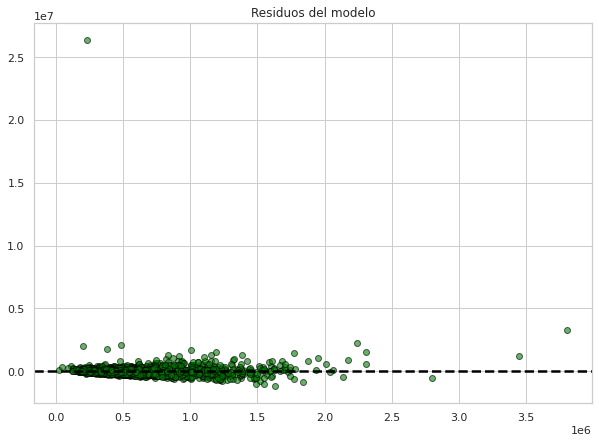

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_train_modelo, y=residuos,
            alpha=0.6, c='green', edgecolor='black')
plt.axhline(y=0, c='black', ls='--', linewidth=2.5)
plt.title("Residuos del modelo");

# Conclusiones

## Comenzaremos analizando los coeficientes del modelo

In [ ]:
coeficientes_modelo.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
variable,intercepto,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city_Bellevue,city_Mercer Island,codp_WA 98004,codp_WA 98040,sqft_lot,yr_built,yr_renovated,interaccion_sqft_liv_lot,interaccion_sqft_lot_floor,interaccion_sqft_abo_lot,interaccion_sqft_base_lot,interaccion_yr_built_ren
coeficiente,5145989.21,-47125.36,58409.72,147.89,-17650.32,519551.32,54234.74,110.44,37.45,107635.12,185316.62,565418.15,185316.62,-0.26,-2614.53,530.11,193746.84,0.31,-6934.76,-0.00,-0.27


$\hat{\beta_0} =$ U\$D $3.480.377,26$ 

Será el precio estimado para una propiedad sin superficie, que no se encuentre en Auburn, Bellevue, Federal Way, Kent o Sammamish.

$\hat{\beta_1} = $ U\$D $-27.991,69$ 

El precio esperado de  una propiedad disminuye en 27.991 dólares cuando aumenta la cantidad de dormitorios en 1.

Esto parecería no tener sentido, pero sabemos que viene asociado a la cantidad de metros cuadrados de la propiedad.

$\hat{\beta_2} = $ U\$D $42.657,19$ 

El precio esperado de  una propiedad aumenta en 42.657 dólares cuando aumenta la cantidad de baños en 1.


$\hat{\beta_3} = $ U\$D $94.91$ 

El precio esperado de  una propiedad aumenta en 94 dólares cuando aumenta la cantidad de metros cuadrados de vivienda en 1 (*aquí vemos lo que influje cada "pie cuadrado" en las métricas de los dormitorios*).

$\hat{\beta_4} = $ U\$D $14.368,51$ 

El precio esperado de  una propiedad aumenta en 14.368 dólares cuando aumenta la cantidad de pisos en 1.

$\hat{\beta_5} = $ U\$D $33.799,11$ 

El precio esperado de  una propiedad aumenta en 33.799 dólares cuando aumenta la clasificación de la vista en 1 (*recordemos que era una clasificación de 1 a 4, siendo 4 la mejor categoría*)

$\hat{\beta_6} = $ U\$D $83,35$,  $\hat{\beta_7} = $ U\$D $11,56$  

El precio de la propiedad aumentará 83 u 11 dólares por cada metro cuadrado extra sin contar el sótano o del sótano, respectivamente.

$\hat{\beta_8} = $ U\$D $-161.920,58$,  $\hat{\beta_{10}} = $ U\$D $-174.817,35$,  $\hat{\beta_{11}} = $ U\$D $-160.011,09$

El precio base de la propiedad disminuirá 161.920, 174.817 o 160.011 dólares si se encuentra en Auburn, Federal Way o Kent. Análogamente:

$\hat{\beta_9} = $ U\$D $165.342,17$, $\hat{\beta_{12}} = $ U\$D $73.570,31$ 

El precio base de la propiedad aumentará 165.342 o 73.570 dólares si se encuentra en Bellevue o en Sammamish, respectivamente.

$\hat{\beta_{13}} = $ U\$D $0,00$

El precio de la propiedad no parecería vefrse afectado si aumentan los metros cuadrados totales.

$\hat{\beta_{14}} = $ U\$D $-1.714,80$

El precio disminuye 1.714 dólares por cada suba en un año de construido.

$\hat{\beta_{15}} = $ U\$D $180,11$

El precio aumenta 180 dólares por cada suba en el año de renovación.

$\hat{\beta_{16}} = $ U\$D $287.678,53$

El precio aumentará *una fracción de* 287.678 dólares, a medida que aumente la proporción de metros cuadrados de vivienda sobre los totales.

 $\hat{\beta_{17}} = $ U\$D $0,04$, 

El precio no parece modificarse cuando aumente la proporción de metros cuadrados totales sobre la cantidad de pisos.

$\hat{\beta_{18}} = $ U\$D $-218.654,25$

El precio disminuirá *una fracción de* 218.654 dólares, a medida que aumente la proporción de metros cuadrados de vivienda (sin tener encuenta el sótano) sobre los totales.

$\hat{\beta_{19}} = $ U\$D $-0,00$,

El precio no parece modificarse cuando aumente la proporción de metros cuadrados de sótano sobre metros cuadrados totales.

$\hat{\beta_{20}} = $ U\$D $-0,09$

El precio no parece modificarse cuando aumente el año de construcción en casas renovadas.


## Gráfico de residuos

In [ ]:
fig = px.scatter(x=y_train_modelo, y=residuos,
            template='simple_white',
            labels={},
            title='Residuos del modelo',
            height=400
                )
fig.show()

Observamos que los residuos se distribuyen al azar alrededor del valor cero, aunque tienen una variabilidad bastante amplia.

## Comparación R$^2$ 

El R$^2$ del modelo que planteamos es 0,59. 

Si bién aún nos encontramos relativamente "lejos" del 1 ideal, vemos una gran mejora al modelo de la entrega anterior que contaba con un R$^2$ de 0,45.